<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.callbacks import EarlyStopping



In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [3]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
#pass standard scalar array in as input 
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [5]:
model = Sequential()
model.add(Dense((40), input_dim=(13), activation='relu'))
model.add(Dense((1), activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [7]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3) #specifiy loss or validation accuracy to monitor aand min delta is smallest chnage between epochs before we want to stop training

In [8]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test,y_test), callbacks=[stop])

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 1s 2ms/sample - loss: 585.5093 - mse: 585.5093 - mae: 22.3853 - val_loss: 614.3135 - val_mse: 614.3136 - val_mae: 23.0503
Epoch 2/50
404/404 [==============================] - 0s 92us/sample - loss: 584.6127 - mse: 584.6127 - mae: 22.3727 - val_loss: 612.6224 - val_mse: 612.6224 - val_mae: 23.0235
Epoch 3/50
404/404 [==============================] - 0s 83us/sample - loss: 582.4398 - mse: 582.4399 - mae: 22.3401 - val_loss: 608.0617 - val_mse: 608.0617 - val_mae: 22.9578
Epoch 4/50
404/404 [==============================] - 0s 90us/sample - loss: 576.7038 - mse: 576.7038 - mae: 22.2520 - val_loss: 600.1397 - val_mse: 600.1396 - val_mae: 22.8352
Epoch 5/50
404/404 [==============================] - 0s 80us/sample - loss: 567.1346 - mse: 567.1346 - mae: 22.0973 - val_loss: 588.7654 - val_mse: 588.7654 - val_mae: 22.6454
Epoch 6/50
404/404 [==============================] - 0s 92us/sample -

In [9]:
scores = model.evaluate(x_test, y_test)
scores

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[39.014933268229164, 39.01493, 4.81526]

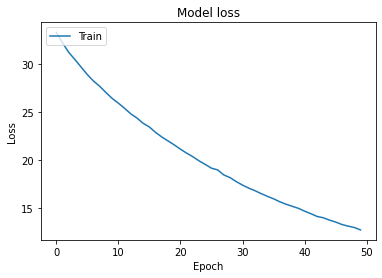

In [10]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=0)
plt.plot(history.history['loss'], )
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [19]:
##### Your Code Here #####

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [27]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [28]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes) #keras encoding here
test_labels = keras.utils.to_categorical(test_labels, num_classes)

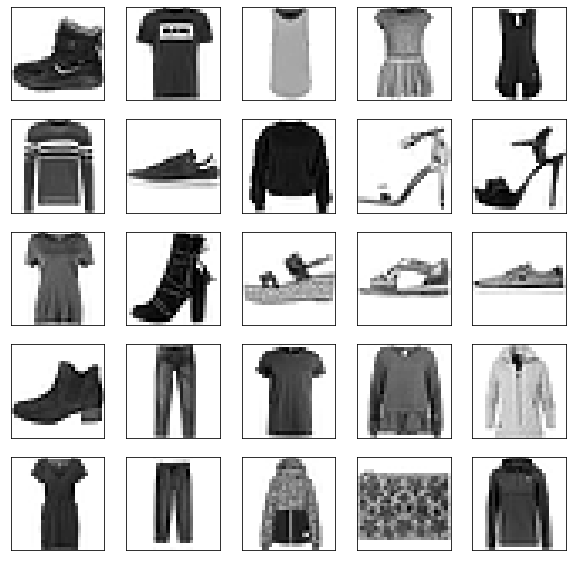

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #images for 2 dimensions (after number of observations for input shape)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax")) #always last layer before compile model and only classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=10, validation_data =(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 3.1440 - accuracy: 0.7070 - val_loss: 0.7862 - val_accuracy: 0.72858374  - ETA: 0s - loss: 3.3245 - accura
Epoch 2/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6876 - accuracy: 0.7649 - val_loss: 0.6979 - val_accuracy: 0.7662
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5893 - accuracy: 0.7977 - val_loss: 0.5464 - val_accuracy: 0.8196
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5287 - accuracy: 0.8202 - val_loss: 0.5632 - val_accuracy: 0.8090
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5049 - accuracy: 0.8277 - val_loss: 0.5918 - val_accuracy: 0.8053
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4974 - accuracy: 0.8288 - val_loss: 0.5925 - val_accuracy: 0.8044
Epoch 7/10
60000/

In [32]:
scores = model.evaluate(test_images,test_labels)
print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
predictions = model.predict(np.array(test_images)) 

In [38]:
predictions[0] ### 9 is predicted and we get 9

array([2.1056548e-13, 6.2336841e-12, 0.0000000e+00, 8.1834184e-12,
       0.0000000e+00, 8.2904644e-02, 3.1963701e-16, 9.4004214e-02,
       1.3419411e-08, 8.2309109e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.